<h1 style="background-color:#0071BD;color:white;text-align:center;padding-top:0.8em;padding-bottom: 0.8em">
Kernel Least Squares Optimization (1)
</h1>

Christian Bauckhage: "NumPy / SciPy Recipes for Data Science: Kernel Least Squares Optimization (1)", Technical Report, March 2015 ([Download from ResearchGate](https://www.researchgate.net/publication/274374009_NumPy_SciPy_Recipes_for_Data_Science_Kernel_Least_Squares_Optimization_1))
  
<p style="background-color:#66A5D1;padding-top:0.2em;padding-bottom: 0.2em" />

In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import scipy.spatial as spt
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt

In [2]:
def create_data_2D(n, w, xmin=-4, xmax=8):
    x = rnd.random(n) * (xmax-xmin) + xmin
    X = np.vander(x, len(w))
    y = np.dot(X, w) + rnd.randn(n) * 0.5
    return x, y

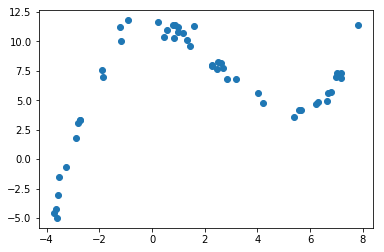

In [3]:
# 2D data Points sample

n = 50
wTrain = np.array([0.1, -0.8, 0.0, 11.5])
xTrain , yTrain = create_data_2D(n, wTrain)
plt.scatter(xTrain, yTrain);

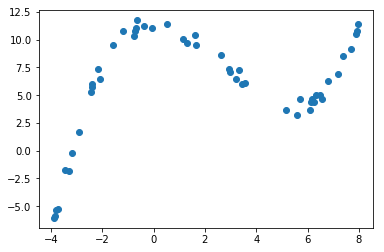

In [4]:

n = 50
wTrain = np.array([0.1, -0.8, 0.0, 11.5])
xTrain , yTrain = create_data_2D(n, wTrain)
XTrain = np.vander(xTrain, 2)
w = sla.lsmr(XTrain, yTrain, damp=1.)
plt.scatter(xTrain, yTrain);

In [5]:
N = 2 * n
xTest = np.linspace(-4, 8, N)
XTest = np.vander(xTest, 2)
yTest = np.dot(XTest, w)
plt.scatter(xTest, yTest);

ValueError: setting an array element with a sequence.

In [ ]:
def polyKernelMat(X, p):
    return (np.dot(X, X.T) + 1.)**p

In [ ]:
def polyKernelVec(x, X, p):
    return (np.dot(x, X.T) + 1.)**p

In [ ]:
K = polyKernelMat(XTrain, p)

In [ ]:
KI = la.inv(K +1. * np.identity(n))
KIy = np.dot(KI, y)

In [ ]:
xTest = np.linspace(-4, 8, N)
XTest = np.vander(xTest, 2)
yTest = np.zeros(N)

In [ ]:
for i in range(N):
    k = polyKernelVec(XTest[i,:], XTrain, p)
    yTest[i] = np.dot(k, KIy)

In [ ]:
def squaredEDM(X):
    V = spt.distance.pdist(X, 'sqeuclidean')
    D =spt.distanve(V)
    return D

In [ ]:
def gausKernelMat(X, s):
    D = squaredEDM(X)
    K = np.exp(-0.5/s**2 * D)    

In [ ]:
def gaussKernelVec(x, X, s):
    d = np.sum(X-x**2., axis-1)
    k = np.exp(-0.5/s**2. * d)
    return k

In [ ]:
KI = la.in

In [ ]:
plt.plot(xTest, yTest, '-');

<table style="width:100%">
  <tr>
      <td colspan="1" style="text-align:left;background-color:#0071BD;color:white">
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">
            <img alt="Creative Commons License" style="border-width:0;float:left;padding-right:10pt"
                 src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" />
        </a>
        &copy; C. Bauckhage and O. Cremers<br/>
        Licensed under a 
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/" style="color:white">
            CC BY-NC 4.0
        </a>.
      </td>
      <td colspan="2" style="text-align:left;background-color:#66A5D1">
          <b>Acknowledgments:</b>
          This material was prepared within the project
          <a href="http://www.b-it-center.de/b-it-programmes/teaching-material/p3ml/" style="color:black">
              P3ML
          </a> 
          which is funded by the Ministry of Education and Research of Germany (BMBF)
          under grant number 01/S17064. The authors gratefully acknowledge this support.
      </td>
  </tr>
</table>